In [1]:
import pipeline
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('data/quora_duplicate_questions.tsv', sep ='\t')
#duplicates = df.loc[df['is_duplicate'] == 1]
#different = df.loc[df['is_duplicate'] == 0]

df = df.loc[:10000]
#duplicates.loc[:5000]
#different.loc[:10000]

X = df[['question1','question2']].dropna()
y = df['is_duplicate']

fittingtext = X['question1'] +' '+X['question2']


In [3]:
def return_top_n(dataFrame, n):
    X = dataFrame[['question1','question2']].dropna()
    y = dataFrame['is_duplicate']
    fittingtext = X['question1'] +' '+X['question2']
    count = CountVectorizer(ngram_range=(1,2), stop_words = 'english')
    FT_count = count.fit_transform(fittingtext)
    terms = count.get_feature_names()
    termcount = FT_count.toarray().sum(axis = 0)
    return pd.DataFrame({'terms' :terms, 'count':termcount}).sort_values(by='count', ascending = False).head(20)

    

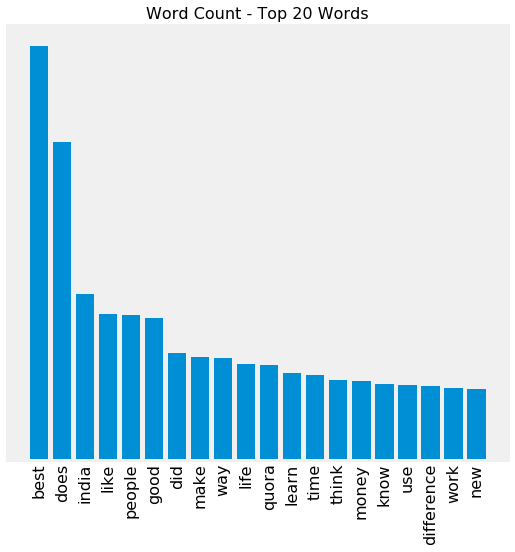

In [12]:
top20 = return_top_n(df,20)

fig,ax = plt.subplots(figsize=(8,8))

ax.bar(top20['terms'], top20['count'])
ax.get_yaxis().set_visible(False)
plt.xticks(rotation=90, fontsize =16)
#fig.xticks(fontsize =16)
plt.title('Word Count - Top 20 Words', fontsize=16)
plt.grid(False)

plt.savefig('SRC/wordcount.png', transparent=True)  

In [ ]:
top20 = return_top_n(duplicates,20)

fig,ax = plt.subplots(figsize=(8,8))

ax.bar(top20['terms'], top20['count'])
plt.xticks(rotation=90)
fig.suptitle('Word Count - Duplicates -  Top 20 Words', fontsize=16)

plt.savefig('SRC/wordcount_dup.png')  

In [ ]:
top20 = return_top_n(different,20)

fig,ax = plt.subplots(figsize=(8,8))

ax.bar(top20['terms'], top20['count'])
plt.xticks(rotation=90)
fig.suptitle('Word Count - Not Duplicates - Top 20 Words', fontsize=16)

plt.savefig('SRC/wordcount_diff.png')  